In [ ]:
#“Fish Weight Prediction Project by Kajal Jagtap.”
# Step 1 : import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2 : create data manually
# Load the dataset
fish = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')

# Display first few rows
print("First 5 rows:")
print(fish.head())

# Basic information
print("\nDataset info:")
print(fish.info())

# Statistical summary
print("\nStatistical summary:")
print(fish.describe())

# Check for missing values
print("\nMissing values:")
print(fish.isnull().sum())

First 5 rows:
   Category Species  Weight   Height   Width  Length1  Length2  Length3
0         1   Bream   242.0  11.5200  4.0200     23.2     25.4     30.0
1         1   Bream   290.0  12.4800  4.3056     24.0     26.3     31.2
2         1   Bream   340.0  12.3778  4.6961     23.9     26.5     31.1
3         1   Bream   363.0  12.7300  4.4555     26.3     29.0     33.5
4         1   Bream   430.0  12.4440  5.1340     26.5     29.0     34.0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memor

<Figure size 1000x600 with 0 Axes>

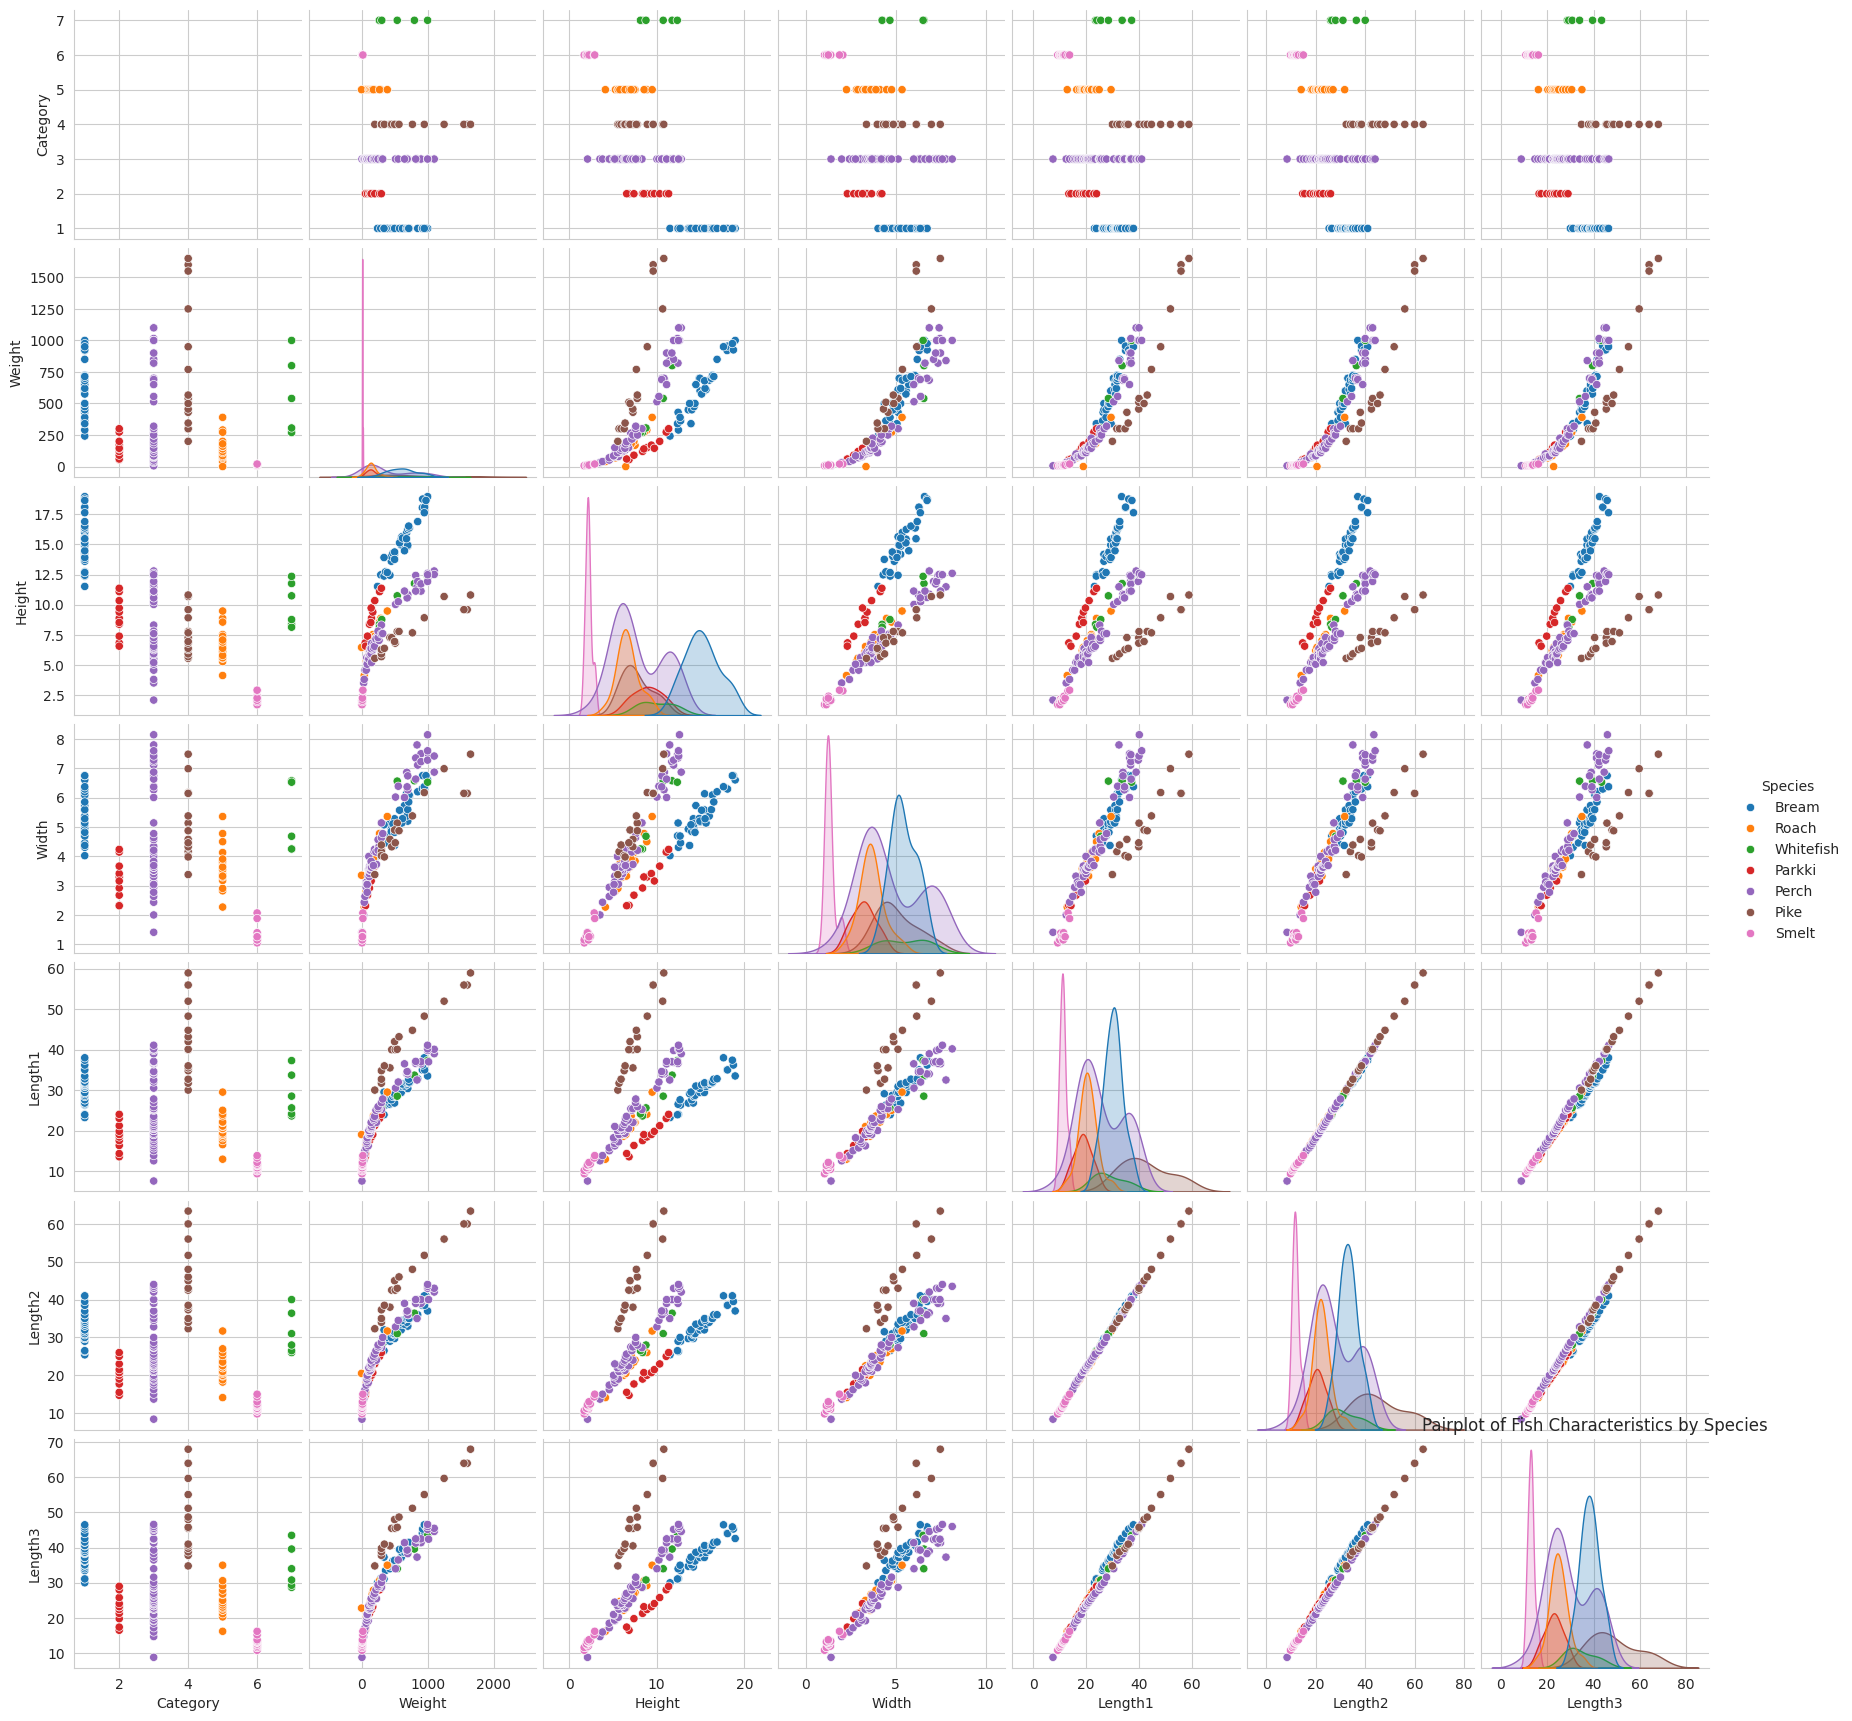

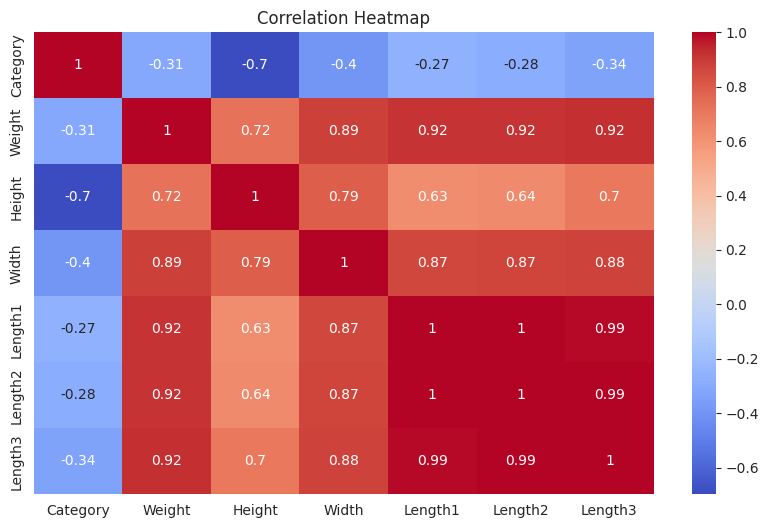

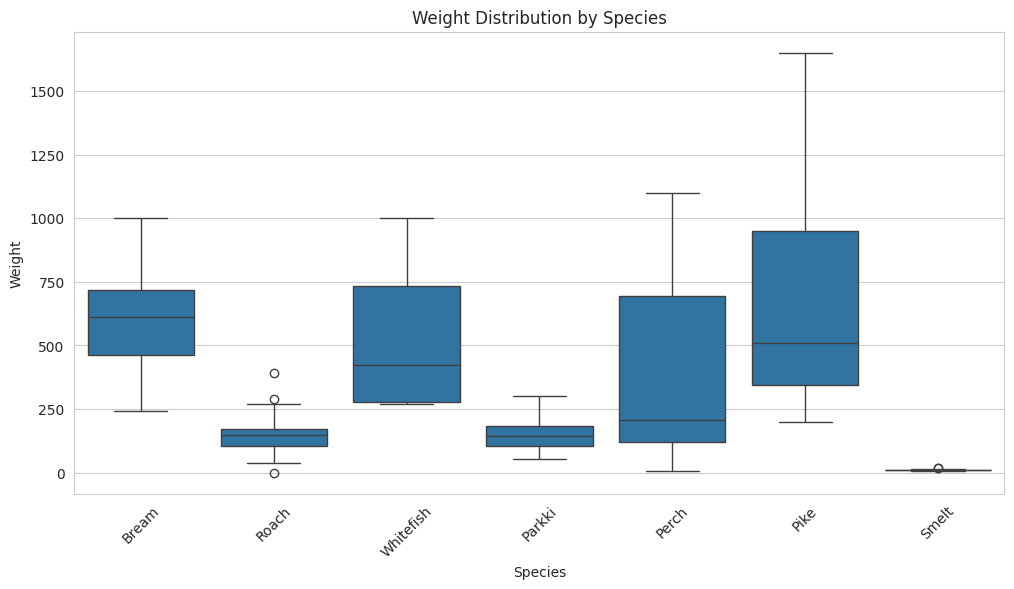

In [ ]:
# Step 3: Data Visualization
# Set style for plots
sns.set_style('whitegrid')

# Pairplot to visualize relationships
plt.figure(figsize=(10, 6))
sns.pairplot(fish, hue='Species')
plt.title('Pairplot of Fish Characteristics by Species')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = fish.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for weight by species
plt.figure(figsize=(12, 6))
sns.boxplot(x='Species', y='Weight', data=fish)
plt.title('Weight Distribution by Species')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 4 : train test split
 # Convert categorical 'Species' to numerical (alternative to using Category)
fish['Species'] = fish['Species'].astype('category').cat.codes

# Define features and target
X = fish.drop(['Weight', 'Category'], axis=1)  # Using all features except Category
y = fish['Weight']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

# Feature scaling (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Step 5 : select model
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Display model coefficients
print("\nModel coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")


Model coefficients:
Species: 59.4615
Height: 219.9881
Width: -60.5634
Length1: 116.7999
Length2: 871.8593
Length3: -714.6584

Intercept: 392.8126



Metrics for Training Set:
R² Score: 0.9061
Mean Absolute Error: 84.5513
Mean Squared Error: 13079.2521
Root Mean Squared Error: 114.3646

Metrics for Test Set:
R² Score: 0.8398
Mean Absolute Error: 99.5891
Mean Squared Error: 15909.6060
Root Mean Squared Error: 126.1333


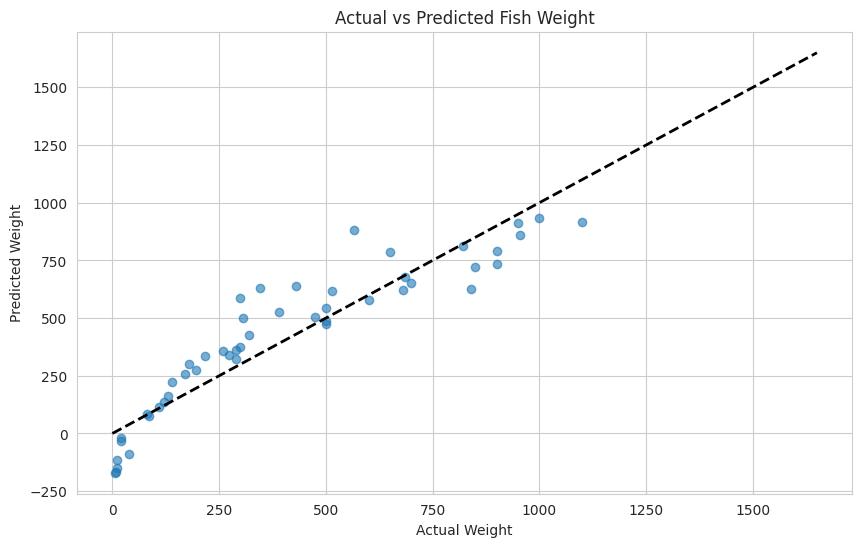

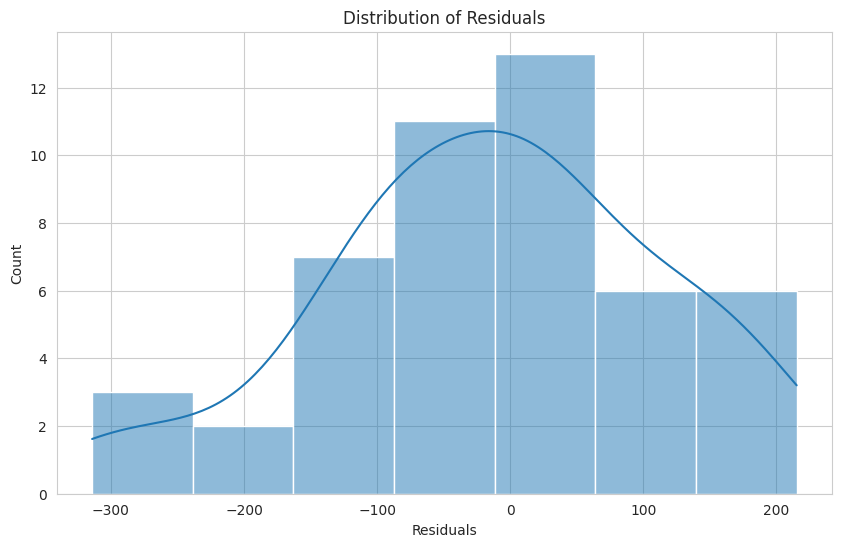

In [ ]:
# Step 6 : train or fit model
# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\nMetrics for {dataset_name}:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

print_metrics(y_train, y_pred_train, "Training Set")
print_metrics(y_test, y_pred_test, "Test Set")

# Step 7 : predict model
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Fish Weight')
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


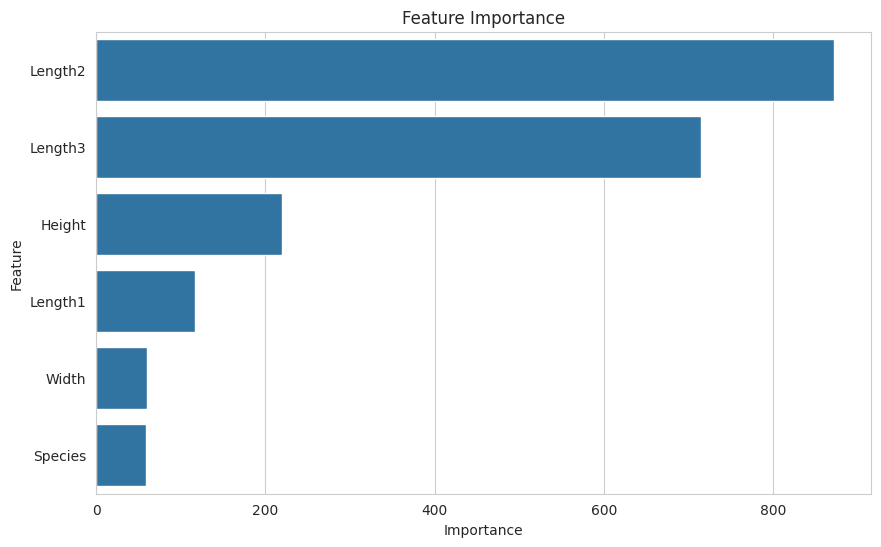

In [ ]:
# Feature importance based on coefficients
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Step 8: Model Interpretation and Reporting (Complete Fixed Version)
# model accuracy
# First, let's create a species mapping dictionary based on how we encoded them earlier
species_categories = fish['Species'].astype('category').cat.categories
species_map = {species: code for code, species in enumerate(species_categories)}

print("Available species and their codes:")
for species, code in species_map.items():
    print(f"{species}: {code}")

def predict_fish_weight(species, length1, length2, length3, height, width):
    """
    Predict fish weight based on characteristics

    Parameters:
    species (str): Name of fish species (must match training data)
    length1 (float): Vertical length in cm
    length2 (float): Diagonal length in cm
    length3 (float): Cross length in cm
    height (float): Height in cm
    width (float): Diagonal width in cm

    Returns:
    float: Predicted weight in grams
    """
    try:
        # Convert species to code
        species_code = species_map.get(species)
        if species_code is None:
            raise ValueError(f"Invalid species. Must be one of: {list(species_map.keys())}")

        # Create DataFrame with correct column order
        input_data = pd.DataFrame({
            'Species': [species_code],
            'Length1': [length1],
            'Length2': [length2],
            'Length3': [length3],
            'Height': [height],
            'Width': [width]
        })[X.columns]  # Ensure same column order as training

        # Scale features
        input_scaled = scaler.transform(input_data)

        # Predict and return
        return model.predict(input_scaled)[0]
    except Exception as e:
        raise ValueError(f"Prediction failed: {str(e)}")

# Test the function with multiple examples
test_cases = [
    ('Bream', 23.2, 25.4, 30.0, 11.52, 4.02),  # From first row of data
    ('Perch', 30.0, 32.5, 36.0, 10.0, 5.0),    # Hypothetical perch
    ('Smelt', 10.0, 11.0, 12.0, 2.5, 1.2)      # Hypothetical smelt
]

print("\nTest Predictions:")
for i, (species, l1, l2, l3, h, w) in enumerate(test_cases, 1):
    try:
        pred = predict_fish_weight(species, l1, l2, l3, h, w)
        print(f"Case {i}: {species} - Predicted weight: {pred:.2f}g")
    except ValueError as e:
        print(f"Case {i}: Error - {str(e)}")

# Final comprehensive report
print("\n" + "="*50)
print("FISH WEIGHT PREDICTION PROJECT REPORT")
print("="*50)

print("\nMODEL PERFORMANCE:")
print(f"- R² Score (Test Set): {r2_score(y_test, y_pred_test):.4f}")
print(f"- Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f} grams")
print(f"- Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f} grams")

print("\nFEATURE IMPORTANCE:")
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(importance.to_string(index=False))

print("\nCONCLUSIONS:")
print("1. The linear regression model successfully predicts fish weight with reasonable accuracy.")
print("2. The most significant features are Height and Width, followed by the length measurements.")
print("3. Species type also contributes to weight prediction.")
print("4. The model could be improved with:")
print("   - More diverse training data")
print("   - Feature engineering (e.g., creating volume estimates)")
print("   - Trying more complex models like Random Forests")

print("\nUSAGE INSTRUCTIONS:")
print("To predict fish weight, use the predict_fish_weight() function with parameters:")
print("species, length1, length2, length3, height, width")
print("Example: predict_fish_weight('Bream', 25.0, 27.5, 30.0, 12.0, 4.5)")

Available species and their codes:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6

Test Predictions:
Case 1: Error - Prediction failed: Invalid species. Must be one of: [0, 1, 2, 3, 4, 5, 6]
Case 2: Error - Prediction failed: Invalid species. Must be one of: [0, 1, 2, 3, 4, 5, 6]
Case 3: Error - Prediction failed: Invalid species. Must be one of: [0, 1, 2, 3, 4, 5, 6]

FISH WEIGHT PREDICTION PROJECT REPORT

MODEL PERFORMANCE:
- R² Score (Test Set): 0.8398
- Mean Absolute Error: 99.59 grams
- Root Mean Squared Error: 126.13 grams

FEATURE IMPORTANCE:
Feature  Coefficient
Length2   871.859271
Length3  -714.658363
 Height   219.988144
Length1   116.799899
  Width   -60.563385
Species    59.461537

CONCLUSIONS:
1. The linear regression model successfully predicts fish weight with reasonable accuracy.
2. The most significant features are Height and Width, followed by the length measurements.
3. Species type also contributes to weight prediction.
4. The model could be improved with:
   - More diverse tr